In [7]:
import numpy as np
import qiskit
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector

In [8]:
def project(img, h_img, w_img, h_proj, w_proj):

    (row, col) = img
    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    r = round(0.5 * np.sqrt(h_proj**2) / np.sqrt(2*np.pi))
    Q = np.array([x, y, z], dtype=np.float32)
    X = get_2d_to_3d(Q,r)
    return X

def get_2d_to_3d(point,r):
    [x, y, _] = point
    k = round(4*r**2 / (x**2 + y**2 + 4*r**2), 4)
    print("r = ", r, " k = ", k)
    size_pix = np.sqrt((k*x)**2+(k*y)**2+((1-2*k)*r)**2)
    k_list.append(k)
    print("size_pix = ", size_pix)
    P = np.array([k * x/size_pix, k * y/size_pix, (1-2*k)*r/size_pix])
    return P

In [12]:
import numpy as np
import pandas as pd
from  math import sqrt

color_list = []
color_index = []

df = pd.DataFrame(columns=range(1,4))

for i in range(0,256):
  for j in range(0,256):
    for k in range(0,256):

      r, g, b = (i,j,k)
      r, g, b = r/255, g/255, b/255
      r, g, b = r-0.5, g-0.5, b-0.5
      r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

      theta = 2 * np.arctan2(sqrt(g**2+b**2),sqrt((1-g**2-b**2)))
      phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
      z = np.cos(theta)
      y = np.sin(theta)*np.sin(phi)
      x = np.sin(theta)*np.cos(phi)
      color_index.append([i,j,k])
      P = np.array([x,y,z])

      color_list.append(P)

color_list

[array([ 0.26444904, -0.90496165, -0.33333333]),
 array([ 0.25207695, -0.91224006, -0.32291683]),
 array([ 0.23991013, -0.91909489, -0.31258234]),
 array([ 0.22793433, -0.92554989, -0.30232987]),
 array([ 0.21613706, -0.93162634, -0.29215943]),
 array([ 0.20450735, -0.93734343, -0.282071  ]),
 array([ 0.19303548, -0.9427185 , -0.27206459]),
 array([ 0.18171281, -0.94776736, -0.2621402 ]),
 array([ 0.17053159, -0.95250448, -0.25229783]),
 array([ 0.15948487, -0.95694312, -0.24253749]),
 array([ 0.14856636, -0.96109555, -0.23285916]),
 array([ 0.13777038, -0.96497307, -0.22326285]),
 array([ 0.12709172, -0.96858621, -0.21374856]),
 array([ 0.11652567, -0.97194476, -0.20431629]),
 array([ 0.10606788, -0.97505787, -0.19496604]),
 array([ 0.09571438, -0.97793409, -0.18569781]),
 array([ 0.08546148, -0.98058146, -0.1765116 ]),
 array([ 0.0753058 , -0.98300753, -0.16740741]),
 array([ 0.06524418, -0.98521942, -0.15838524]),
 array([ 0.0552737 , -0.98722388, -0.14944509]),
 array([ 0.04539164,

In [6]:
def is_duplicate(arr1, arr2):
    return sorted(arr1) == sorted(arr2)

def find_duplicates(arrays):
    duplicates = set()

    for i in range(len(arrays)):
        for j in range(i + 1, len(arrays)):
            if is_duplicate(arrays[i], arrays[j]):
                duplicates.add(tuple(arrays[i]))

    return list(duplicates)

result = find_duplicates(color_list)
print(result)

KeyboardInterrupt: 

In [13]:
color_list[0]

array([ 0.26444904, -0.90496165, -0.33333333])

In [11]:
for i in range(32):
    color_space = color_space_1 = pd.Series(color_list[524288*i:524288*(i+1)], index = pd.Index(color_index[524288*i:524288*(i+1)]))
    color_space.to_excel(f"color_space{i}.xlsx", index=True)

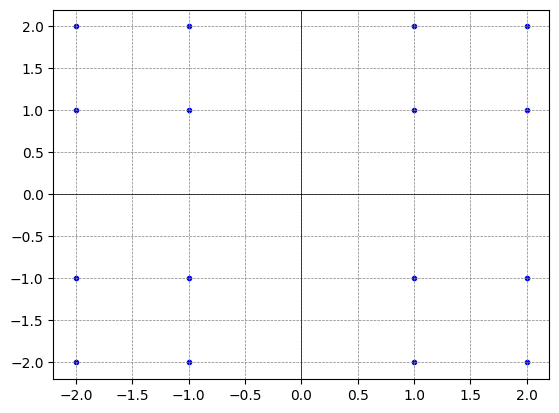

In [9]:
import matplotlib.pyplot as plt

def create_grid(n):
    """원점을 기준으로 한 격자점 생성"""
    x_points = list([-2,-1,1,2])
    y_points = list([-2,-1,1,2])

    # 격자 생성
    grid_points = [(x, y) for x in x_points for y in y_points]

    return grid_points

def plot_grid(grid_points):
    """격자점을 시각화"""
    x_values, y_values = zip(*grid_points)
    plt.scatter(x_values, y_values, marker='.', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# 격자의 크기 설정 (예: 3x3 격자)
grid_size = 2

# 격자 생성
grid_points = create_grid(grid_size)

# 격자 시각화
plot_grid(grid_points)

In [10]:
pix = np.array(grid_points)

In [11]:
pix

array([[-2, -2],
       [-2, -1],
       [-2,  1],
       [-2,  2],
       [-1, -2],
       [-1, -1],
       [-1,  1],
       [-1,  2],
       [ 1, -2],
       [ 1, -1],
       [ 1,  1],
       [ 1,  2],
       [ 2, -2],
       [ 2, -1],
       [ 2,  1],
       [ 2,  2]])

In [12]:
x,y = np.array(grid_points)[0]

In [13]:
x,y

(-2, -2)

In [16]:
h_img = 4
w_img = 4
h_proj_4 = 4
w_proj_4 = 4

point_2d = []
point_3d = []
k_list = []
for i in pix:
    sphere = project(i,h_img, w_img, h_proj_4, w_proj_4)
    point_2d.append(i)
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)
print("k = ", k_list)

x,y,z =  -2 -2 0
r =  1  k =  0.3333
size_pix =  0.9999333377780741
x,y,z =  -2 -1 0
r =  1  k =  0.4444
size_pix =  0.9999111160498216
x,y,z =  -2 1 0
r =  1  k =  0.4444
size_pix =  0.9999111160498216
x,y,z =  -2 2 0
r =  1  k =  0.3333
size_pix =  0.9999333377780741
x,y,z =  -1 -2 0
r =  1  k =  0.4444
size_pix =  0.9999111160498216
x,y,z =  -1 -1 0
r =  1  k =  0.6667
size_pix =  1.0000666677777037
x,y,z =  -1 1 0
r =  1  k =  0.6667
size_pix =  1.0000666677777037
x,y,z =  -1 2 0
r =  1  k =  0.4444
size_pix =  0.9999111160498216
x,y,z =  1 -2 0
r =  1  k =  0.4444
size_pix =  0.9999111160498216
x,y,z =  1 -1 0
r =  1  k =  0.6667
size_pix =  1.0000666677777037
x,y,z =  1 1 0
r =  1  k =  0.6667
size_pix =  1.0000666677777037
x,y,z =  1 2 0
r =  1  k =  0.4444
size_pix =  0.9999111160498216
x,y,z =  2 -2 0
r =  1  k =  0.3333
size_pix =  0.9999333377780741
x,y,z =  2 -1 0
r =  1  k =  0.4444
size_pix =  0.9999111160498216
x,y,z =  2 1 0
r =  1  k =  0.4444
size_pix =  0.99991111604

In [17]:
point_3d[0]

array([-0.66664444, -0.66664444,  0.33342223])

In [18]:
back_poind_3d = point_3d[0] * 1 / k_list[0]

In [19]:
back_poind_3d

array([-2.00013333, -2.00013333,  1.00036672])

In [20]:
back_poind_3d = np.array([round(back_poind_3d[0]), round(back_poind_3d[1]), 0])

In [21]:
back_poind_3d

array([-2, -2,  0])

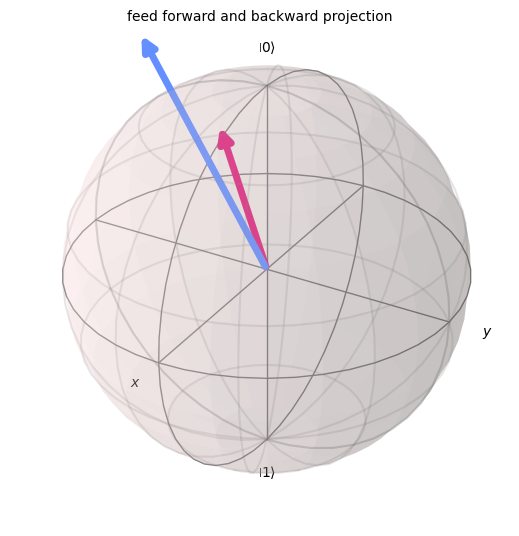

In [22]:
point_3d[0]
back_poind_3d
plot_bloch_vector([point_3d[0]]+[back_poind_3d], title = "feed forward and backward projection")

[array([-0.66664444, -0.66664444,  0.33342223]), array([-0.88887901, -0.4444395 ,  0.11120988]), array([-0.88887901,  0.4444395 ,  0.11120988]), array([-0.66664444,  0.66664444,  0.33342223]), array([-0.4444395 , -0.88887901,  0.11120988]), array([-0.66665556, -0.66665556, -0.33337777]), array([-0.66665556,  0.66665556, -0.33337777]), array([-0.4444395 ,  0.88887901,  0.11120988]), array([ 0.4444395 , -0.88887901,  0.11120988]), array([ 0.66665556, -0.66665556, -0.33337777]), array([ 0.66665556,  0.66665556, -0.33337777]), array([0.4444395 , 0.88887901, 0.11120988]), array([ 0.66664444, -0.66664444,  0.33342223]), array([ 0.88887901, -0.4444395 ,  0.11120988]), array([0.88887901, 0.4444395 , 0.11120988]), array([0.66664444, 0.66664444, 0.33342223])]


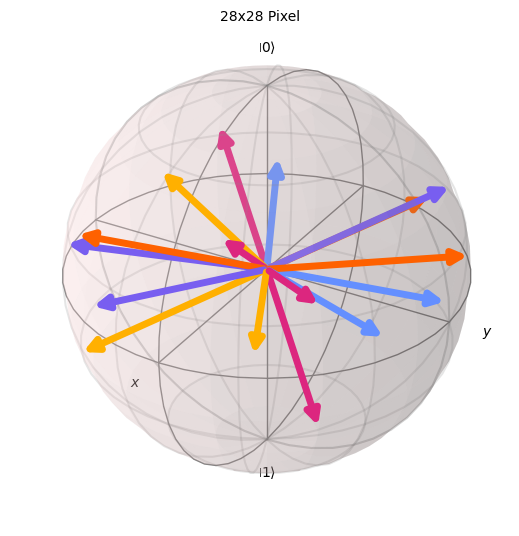

In [23]:
print(point_3d)

plot_bloch_vector(point_3d[:], title = "28x28 Pixel")

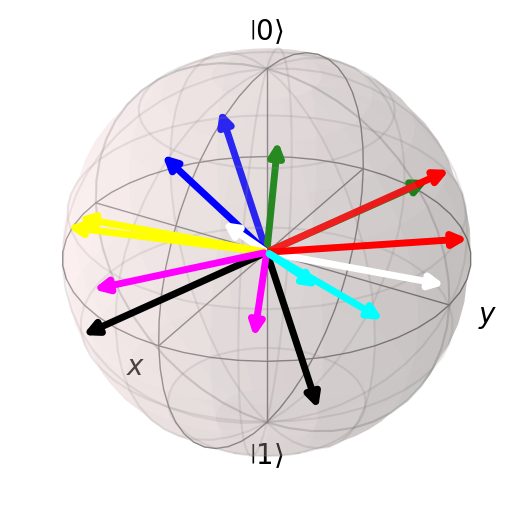

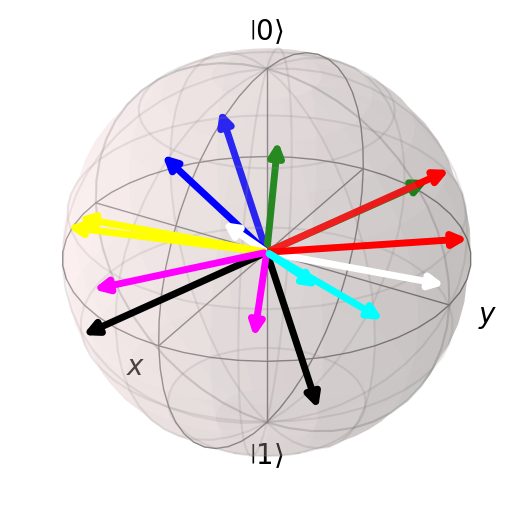

In [38]:
from qiskit.visualization.bloch import Bloch
_bloch = Bloch()
_bloch.vector_color = ['blue','green','green','red',
                       'blue','white','white','red',
                        'yellow','black','black','cyan',
                        'yellow','magenta','magenta','cyan']
_bloch.add_vectors(point_3d[:])
_bloch.render()
_bloch.fig

In [40]:
import numpy as np
from math import sqrt
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector

In [30]:
blue_color = []

for i in range(0,256):
  r, g, b = (0,0,i)
  r, g, b = r/255, g/255, b/255
  r, g, b = r-0.5, g-0.5, b-0.5
  r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

  theta = 2*2 * np.arctan2(sqrt(1-g**2-b**2),sqrt((g**2+b**2)))
  phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
  z = np.cos(theta)
  y = np.sin(theta)*np.sin(phi)
  x = np.sin(theta)*np.cos(phi)
  P = [x,y,z]
  blue_color.append(P)


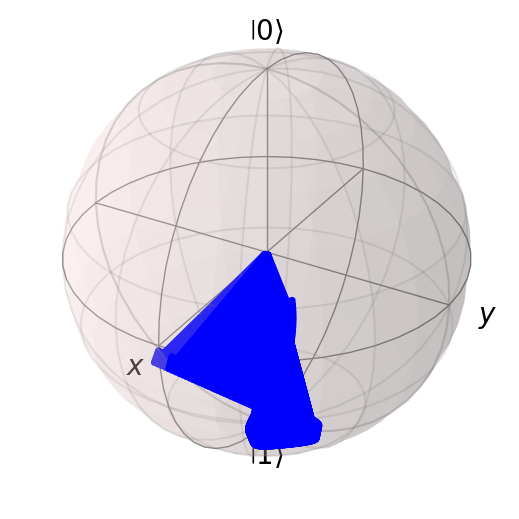

In [31]:
from qiskit.visualization.bloch import Bloch
_bloch = Bloch()
_bloch.vector_color = ['blue']
_bloch.add_vectors(blue_color)
_bloch.render()

In [32]:
red_color = []
for i in range(0,256):
  r, g, b = (i,0,0)
  r, g, b = r/255, g/255, b/255
  r, g, b = r-0.5, g-0.5, b-0.5
  r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

  theta = 2*2 * np.arctan2(sqrt(1-g**2-b**2),sqrt((g**2+b**2)))
  phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
  z = np.cos(theta)
  y = np.sin(theta)*np.sin(phi)
  x = np.sin(theta)*np.cos(phi)
  P = [x,y,z]
  red_color.append(P)

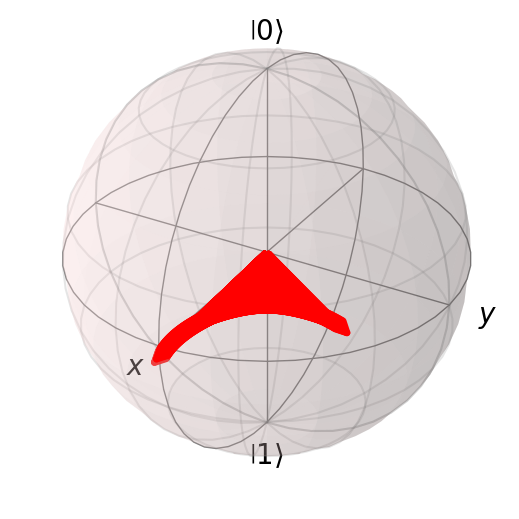

In [33]:
from qiskit.visualization.bloch import Bloch
_bloch = Bloch()
_bloch.vector_color = ['red']
_bloch.add_vectors(red_color)
_bloch.render()

In [34]:
red_color

[[0.17629935906300856, -0.6033077692099077, -0.777777777777777],
 [0.1677527240390758, -0.605739838521896, -0.777777777777777],
 [0.1593820286586927, -0.6079959681903349, -0.777777777777777],
 [0.1511750501589691, -0.6100883809781138, -0.777777777777777],
 [0.14312100032286618, -0.6120278651022721, -0.777777777777777],
 [0.13521029943057444, -0.6138240002826195, -0.777777777777777],
 [0.12743439413885638, -0.6154853398623931, -0.777777777777777],
 [0.11978560927553071, -0.6170195590137745, -0.777777777777777],
 [0.1122570261279869, -0.6184335764493737, -0.777777777777777],
 [0.10484238165159414, -0.619733655213822, -0.777777777777777],
 [0.0975359843597337, -0.6209254867937382, -0.777777777777777],
 [0.09033264363664013, -0.6220142618048872, -0.777777777777777],
 [0.08322760994134598, -0.6230047297882368, -0.777777777777777],
 [0.07621652391706144, -0.6239012501005772, -0.777777777777777],
 [0.06929537283478263, -0.6247078354709115, -0.777777777777777],
 [0.06246045311760664, -0.625428

In [40]:
for i, j in zip(red_color, blue_color):
    if i == j:
        print(i)

[0.17629935906300856, -0.6033077692099077, -0.777777777777777]


-0.572822031784217 -0.572822031784217 0.5773502691896258 2.352257502659388


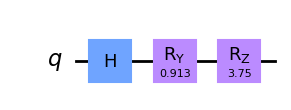

In [42]:
r, g, b = (1,1,255)
r, g, b = r/255, g/255, b/255
r, g, b = r-0.5, g-0.5, b-0.5

r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
print(r,g,b, np.arctan2(b,g))
theta = 2*2 * np.arctan2(sqrt(1-g**2-b**2),sqrt((g**2+b**2)))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(-(0.5*np.pi-theta),0)
qc.rz(phi,0)
qc.draw('mpl')


Statevector([-0.09622076-0.30824802j, -0.28201057+0.90343498j],
            dims=(2,))


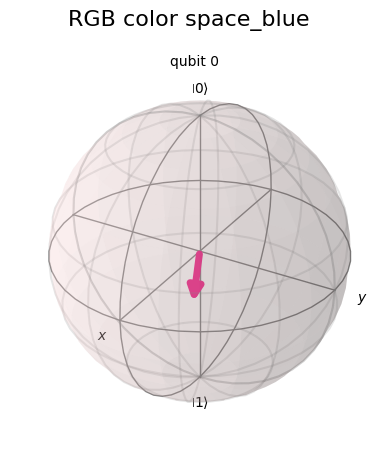

In [43]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_blue")

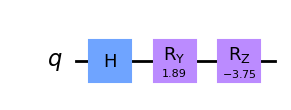

In [50]:
r, g, b = (255,1,1)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

Statevector([ 0.04755209-0.15093035j, -0.29671218-0.94176468j],
            dims=(2,))


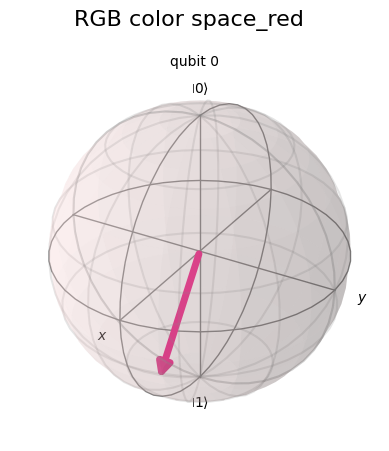

In [51]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_red")

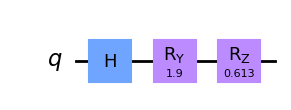

In [53]:
r, g, b = (1,255,1)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')


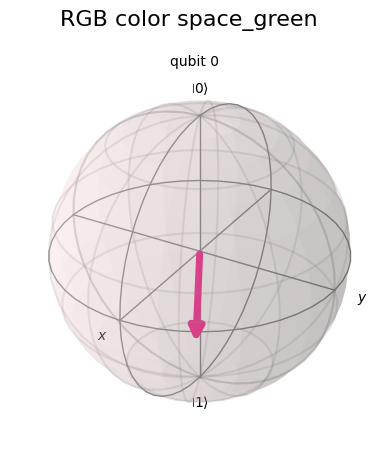

In [54]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title = "RGB color space_green")

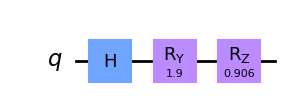

In [57]:
r, g, b = (255,1,255)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')


Statevector([-0.14716432+0.07161696j,  0.887054  +0.43168146j],
            dims=(2,))


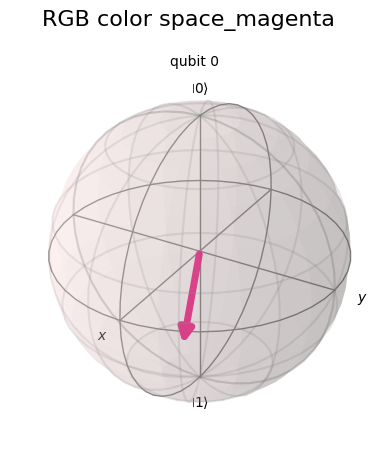

In [58]:
state = Statevector.from_instruction(qc)

print(state)
plot_bloch_multivector(state, title = "RGB color space_magenta")

Statevector([-0.07436901+0.15187077j,  0.43345434+0.8851677j ],
            dims=(2,))


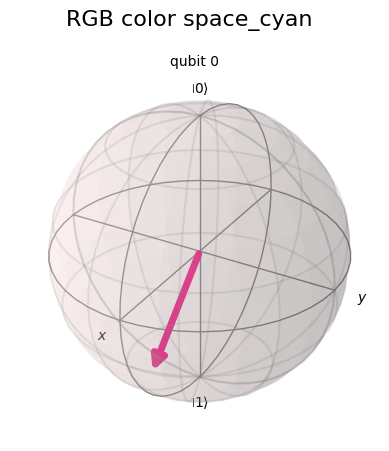

In [60]:
r, g, b = (1,255,255)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_cyan")

Statevector([0.25666183+0.52217458j, 0.35876209-0.72989601j],
            dims=(2,))


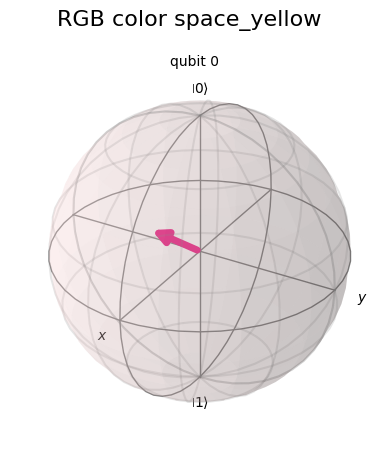

In [61]:
r, g, b = (255,255,1)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)

theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_yellow")

Statevector([0.57152672+0.0817957j , 0.80826085-0.11567658j],
            dims=(2,))


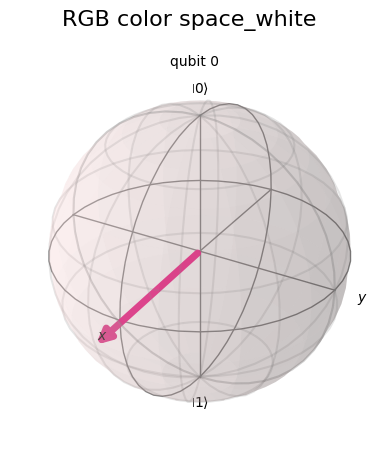

In [39]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
r, g, b = (255,255,255)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)

theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))


phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))

qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_white")

Statevector([0.51449364+0.28115145j, 0.71087537-0.38846669j],
            dims=(2,))


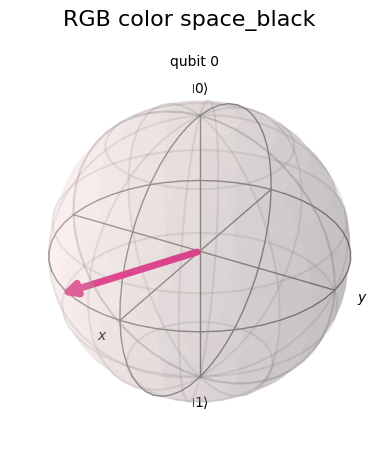

In [64]:
r, g, b = (1,1,1)
r, g, b = r/255, g/255, b/255
r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)

theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_black")

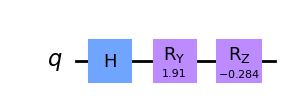

In [9]:
import qiskit
from math import sqrt
import numpy as np
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)

r, g, b = (255,255,255)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


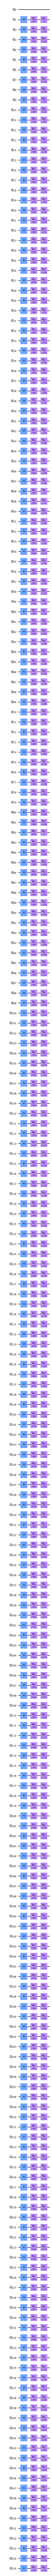

In [68]:
qc = QuantumCircuit(256)
for i in range(1,256):
  r, g, b = (i,1,1)
  r, g, b = r/255, g/255, b/255

  r, g, b = r-0.5, g-0.5, b-0.5
  r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)
  qc.h(i)
  theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
  phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
  qc.ry(theta,i)
  qc.rz(phi,i)

qc.draw('mpl')

In [69]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_black")

ValueError: ignored

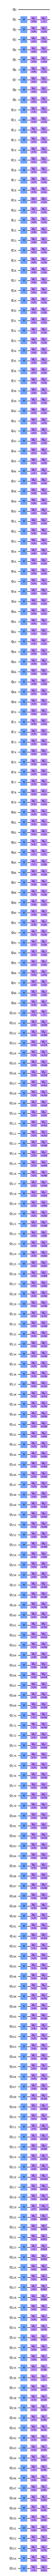

In [70]:
qc = QuantumCircuit(256)
for i in range(1,256):
  r, g, b = (1,i,1)
  r, g, b = r/255, g/255, b/255

  r, g, b = r-0.5, g-0.5, b-0.5
  r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)
  qc.h(i)
  theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
  phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
  qc.ry(theta,i)
  qc.rz(phi,i)

qc.draw('mpl')